## Correlating NAO and Overturning anomalies

In this notebook, we compute correlations between NAO and overturning anomalies. Since overturning strength could evolve in some definite time due to atmospheric forcing, we consider time-lagged correlation. Moreoever, oceans may retain memomry for some time. Thus, it might be more approapriate to use intergral definitions.

Assuming that surface heat flux anomalies, which are strongly correlated to NAO phases, affect overturning with some time lag, we could write the following


$\psi(y,t+\tau) \propto \int_{t_0}^{t}\text{NAO}dt$


In [1]:
# Load libraries

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
ppdir = "/home/users/hkhatri/DePreSys4_Data/Data_Anomaly_Compute/"

ds_NAO = xr.open_dataset(ppdir + "NAO_SLP_Anomaly.nc")

print(ds_NAO)

<xarray.Dataset>
Dimensions:     (start_year: 57, r: 10, time: 125)
Coordinates:
  * start_year  (start_year) int64 1960 1961 1962 1963 ... 2013 2014 2015 2016
Dimensions without coordinates: r, time
Data variables:
    NAO         (start_year, r, time) float64 ...
    P_south     (start_year, r, time) float64 ...
    P_north     (start_year, r, time) float64 ...
    time_val    (start_year, time) object ...


In [5]:
ppdir="/home/users/hkhatri/DePreSys4_Data/Data_Consolidated/"

# variable list to keep in the dataset
var_list = ['hfbasin_atlantic', 'sltbasin_atlantic', 'zomsfatl']

ds = []

# Loop over year to combine indivual year files
for year in range(1960, 2017):
    
    d = xr.open_dataset(ppdir + str(year) + "_diaptr.nc", decode_times=False, chunks={'r':1})
    d = d.get(var_list)
    ds.append(d)
    
ds = xr.concat(ds, dim='start_year')

ds = ds.assign(start_year = np.arange(1960, 2017))

ds = ds.chunk({'start_year': 1})

ds = xr.decode_cf(ds)

print(ds)

<xarray.Dataset>
Dimensions:            (start_year: 57, r: 10, time_counter: 125, y: 451, x: 1, depthw: 75)
Coordinates:
  * depthw             (depthw) float32 0.0 1.024 2.103 ... 5.596e+03 5.8e+03
    nav_lat            (y, x) float32 dask.array<chunksize=(451, 1), meta=np.ndarray>
    nav_lon            (y, x) float32 dask.array<chunksize=(451, 1), meta=np.ndarray>
    time_centered      (start_year, time_counter) object dask.array<chunksize=(1, 125), meta=np.ndarray>
  * time_counter       (time_counter) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
  * start_year         (start_year) int64 1960 1961 1962 1963 ... 2014 2015 2016
Dimensions without coordinates: r, y, x
Data variables:
    hfbasin_atlantic   (start_year, r, time_counter, y, x) float32 dask.array<chunksize=(1, 1, 125, 451, 1), meta=np.ndarray>
    sltbasin_atlantic  (start_year, r, time_counter, y, x) float32 dask.array<chunksize=(1, 1, 125, 451, 1), meta=np.ndarray>
    zomsfatl           (start_year, r, time_counter, dep

In [9]:
ppdir_drift="/home/users/hkhatri/DePreSys4_Data/Data_Drift_Removal/Drift_1970_2016_Method_DCPP/"

ds_drift = []

for lead_year in range(0, 11):
    
    d = xr.open_dataset(ppdir_drift + "diaptr/" + "Drift_diaptr_Lead_Year_" + 
                        str(lead_year + 1) + ".nc", decode_times= False)
    d = d.assign(time_counter = np.arange(lead_year*12, 12*lead_year + np.minimum(12, len(d['time_counter'])), 1))
    
    ds_drift.append(d)
    
ds_drift = xr.concat(ds_drift, dim='time_counter')

ds_drift = ds_drift.get(var_list)

print(ds_drift)

<xarray.Dataset>
Dimensions:            (r: 10, time_counter: 125, y: 451, x: 1, depthw: 75)
Coordinates:
  * depthw             (depthw) float32 0.0 1.024 2.103 ... 5.596e+03 5.8e+03
    nav_lat            (y, x) float32 3.997 4.246 4.495 ... 79.85 79.92 79.99
    nav_lon            (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * time_counter       (time_counter) int64 0 1 2 3 4 5 ... 120 121 122 123 124
    time_centered      (time_counter) float64 3.635e+09 3.638e+09 ... 3.646e+09
    start_year         (time_counter) int64 2016 2016 2016 ... 2006 2006 2006
Dimensions without coordinates: r, y, x
Data variables:
    hfbasin_atlantic   (r, time_counter, y, x) float32 1.415 1.411 ... 0.03427
    sltbasin_atlantic  (r, time_counter, y, x) float32 0.01166 ... -0.02729
    zomsfatl           (r, time_counter, depthw, y, x) float32 -0.04033 ... 0.0


In [11]:
ds = ds.drop('time_counter') 
ds_drift = ds_drift.drop(['time_counter','start_year'])

ds_anom = ds - ds_drift

print(ds_anom)

<xarray.Dataset>
Dimensions:            (depthw: 75, y: 451, x: 1, start_year: 57, r: 10, time_counter: 125)
Coordinates:
  * depthw             (depthw) float32 0.0 1.024 2.103 ... 5.596e+03 5.8e+03
    nav_lat            (y, x) float32 3.997 4.246 4.495 ... 79.85 79.92 79.99
    nav_lon            (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * start_year         (start_year) int64 1960 1961 1962 1963 ... 2014 2015 2016
Dimensions without coordinates: y, x, r, time_counter
Data variables:
    hfbasin_atlantic   (start_year, r, time_counter, y, x) float32 dask.array<chunksize=(1, 1, 125, 451, 1), meta=np.ndarray>
    sltbasin_atlantic  (start_year, r, time_counter, y, x) float32 dask.array<chunksize=(1, 1, 125, 451, 1), meta=np.ndarray>
    zomsfatl           (start_year, r, time_counter, depthw, y, x) float32 dask.array<chunksize=(1, 1, 125, 75, 451, 1), meta=np.ndarray>


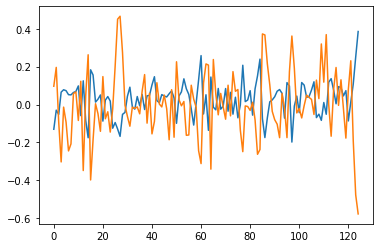

In [19]:
HT = ds_anom['hfbasin_atlantic'].mean('x')
HT = HT.assign_coords(y=ds.nav_lat.isel(x=0))

plt.plot(HT.sel(start_year=1967,r=0).sel(y=50., method="nearest"))

plt.plot(ds_NAO['NAO'].sel(start_year=1967,r=0)/10.)

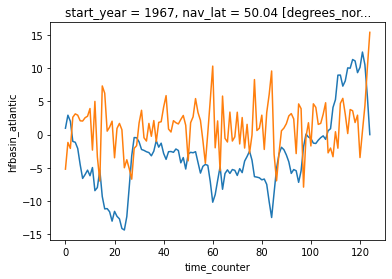

In [31]:
ds_NAO['NAO'].sel(start_year=1967,r=0).cumsum('time').plot()
(HT*40.).sel(start_year=1967,r=0).sel(y=50., method="nearest").plot()

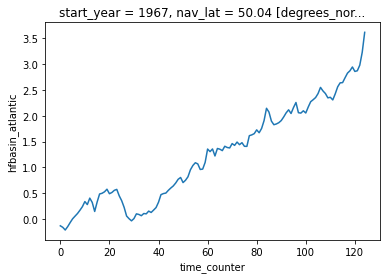

In [26]:
HT.sel(start_year=1967,r=0).sel(y=50., method="nearest").cumsum('time_counter').plot()